In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 170)

In [5]:
df=pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [7]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.00,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.80,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.00,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.00,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.40,1,1,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
print("Heart Disease data set dimensions : {}".format(df.shape))
df.groupby('target').size()

Heart Disease data set dimensions : (1025, 14)


target
0    499
1    526
dtype: int64

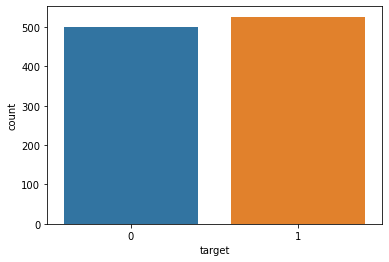

In [11]:
sns.countplot(x="target", data=df); #countig outcome

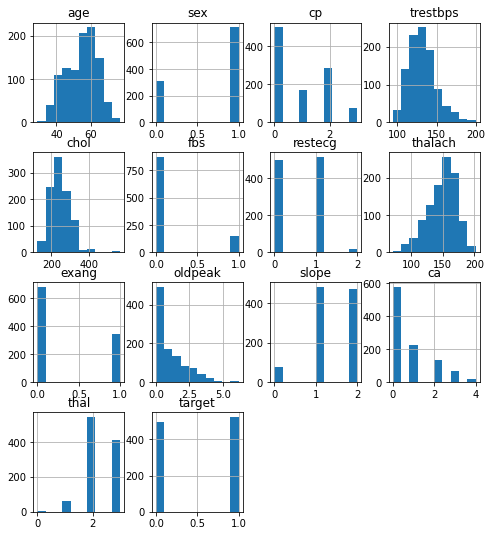

In [12]:
df.hist(bins = 10, figsize = (8,9))#looking all data set
pl.show()

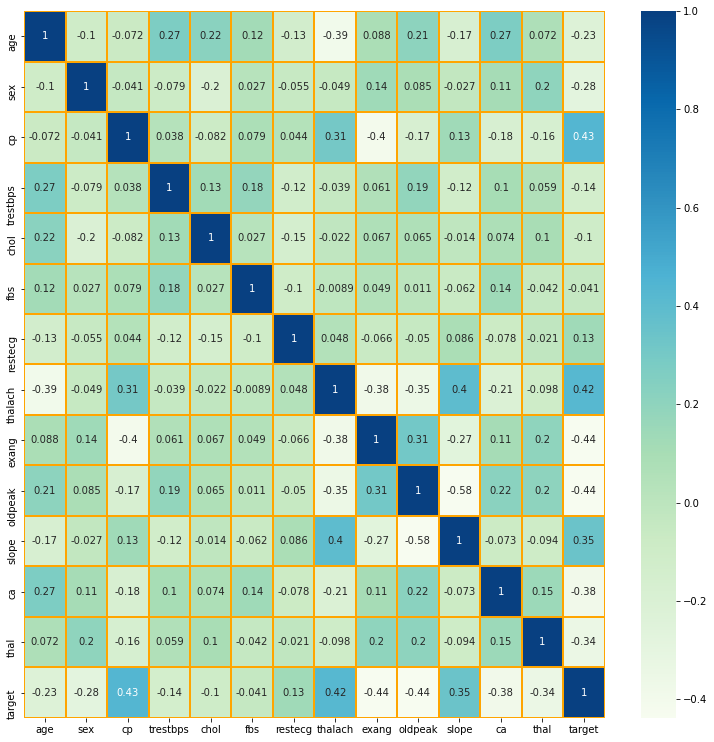

In [13]:
pl.figure(figsize = (13,13))
sns.heatmap(df.corr(),robust=True,fmt='.2g',linewidths=1,linecolor = 'orange', annot=True, cmap='GnBu'); #heat map

<Figure size 936x936 with 0 Axes>

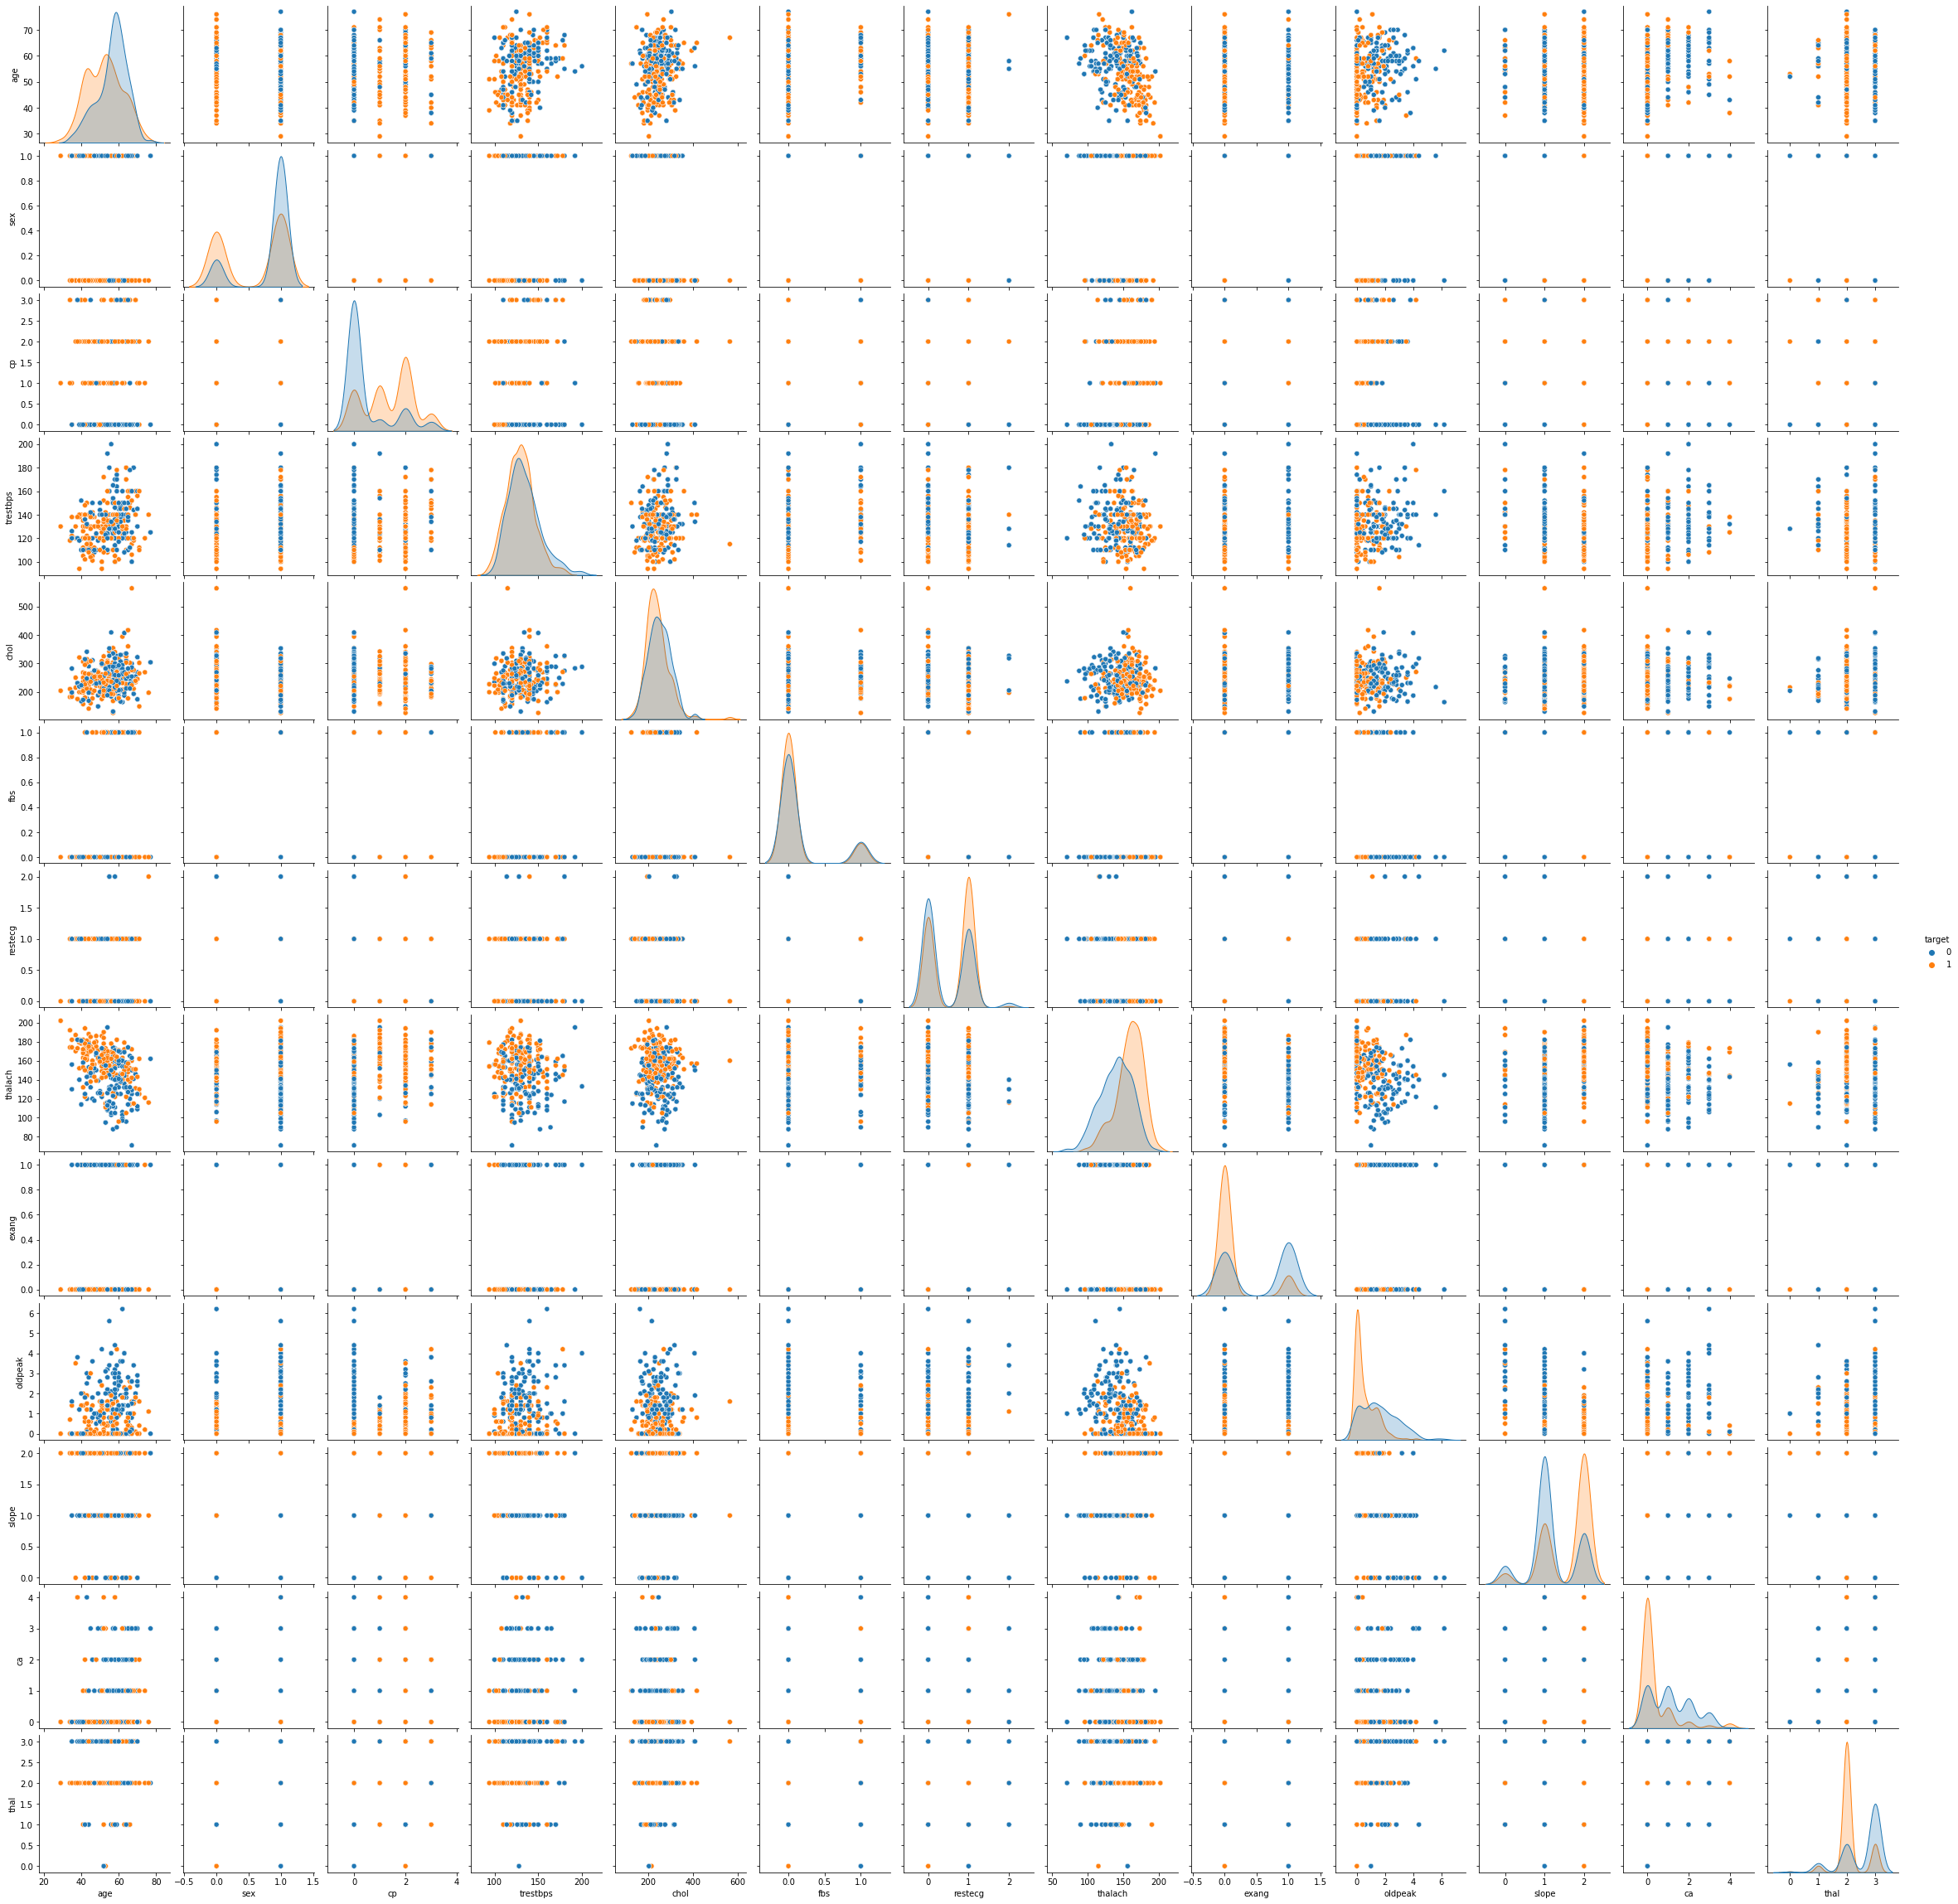

In [14]:
#pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(14, 14));
pl.figure(figsize=(13,13))
sns.pairplot(df, hue='target');

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.00,54.43,9.07,29.00,48.00,56.00,61.00,77.00
sex,1025.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
cp,1025.00,0.94,1.03,0.00,0.00,1.00,2.00,3.00
trestbps,1025.00,131.61,17.52,94.00,120.00,130.00,140.00,200.00
chol,1025.00,246.00,51.59,126.00,211.00,240.00,275.00,564.00
fbs,1025.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,1025.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalach,1025.00,149.11,23.01,71.00,132.00,152.00,166.00,202.00
exang,1025.00,0.34,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,1025.00,1.07,1.18,0.00,0.00,0.80,1.80,6.20


In [16]:
def outcome_agg(col):
    for i in col:  
        print(df.groupby("target").agg({i: "mean"}))
                   

In [17]:
def get_cols(df, class_):
    cols = []
    for col in df.columns:
        if col!=class_:
            cols.append(col)
    return cols

In [18]:
var_names=get_cols(df, "target")
var_names


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [19]:
cols=['age', 'trestbps', 'chol', 'restecg', 'thalach' ,'oldpeak', 'slope', 'ca', 'thal' ]
def c_dis_plot(df, cols):
    for col in cols:
        sns.distplot(df[col])
        pl.axvline(df[col].mean(),color='r',label='mean',linestyle='--')
        pl.axvline(np.median(df[col]),color='y',label='median')
        pl.axvline((df[col].mode())[0],color='g',label='mode')
        pl.legend()
        pl.show();


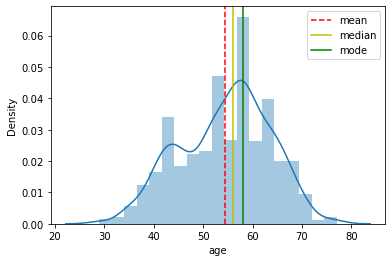

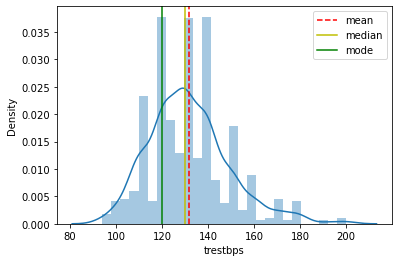

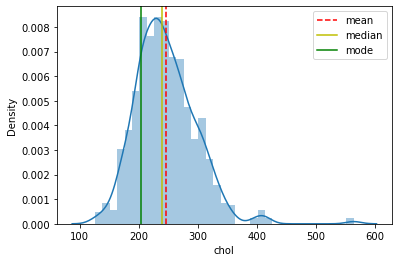

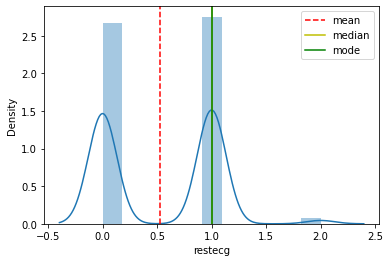

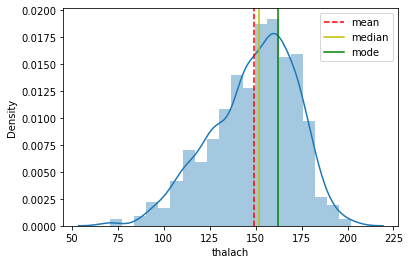

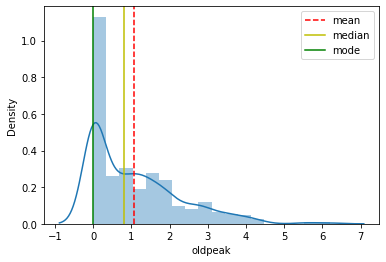

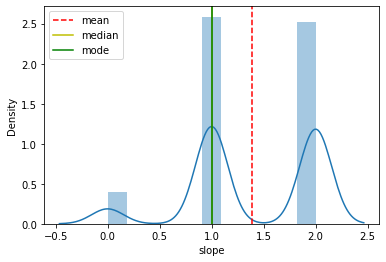

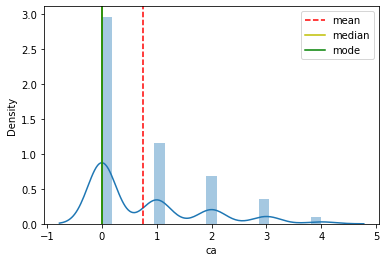

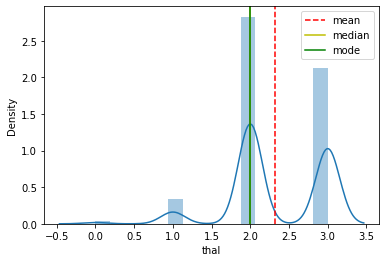

In [20]:

c_dis_plot(df,cols)

Machine Learning


*Model preparation*

In [21]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[119  40]
 [ 20 129]]


Accuracy of Logistic Regression: 80.51948051948052 

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



In [62]:
#Model Tunning cross vallidation
lr = LogisticRegression()
loj_model = lr.fit(X_train, y_train)
lr_predict = loj_model.predict(X_test)
print(accuracy_score(y_test,lr_predict))


0.8051948051948052


In [72]:
lr_tun_score= cross_val_score(loj_model,X_test,y_test, cv=10).mean()



In [26]:
m2 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[130  29]
 [ 20 129]]


Accuracy of K-NeighborsClassifier: 84.0909090909091 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       159
           1       0.82      0.87      0.84       149

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



In [27]:
#modell tunning

knn = KNeighborsClassifier()
knn_params={'n_neighbors':np.arange(1,50)}
knn_cv_model=GridSearchCV(knn, knn_params,cv=10).fit(X_train, y_train)
knn_cv_model.best_score_



0.9776408450704224

In [28]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [29]:
knn_tuned=KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn_predicted = knn_tuned.predict(X_test)

knn_tuned_score=accuracy_score(y_test, knn_predicted)
knn_tuned_score


0.9902597402597403

In [30]:
m3 = 'Support Vector Classifier'
svc =  SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix =confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[137  22]
 [ 12 137]]


Accuracy of Support Vector Classifier: 88.96103896103897 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       159
           1       0.86      0.92      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



In [31]:
# Model Tunning
svc =  SVC()
svc_params= { 'C': np.arange(1,10), 'kernel': ['linear', 'rbf' ]}
svc_cv_model = GridSearchCV(svc, svc_params, cv=5, n_jobs=-1, verbose=2 ).fit(X_train, y_train)
svc_cv_model



Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [32]:
svc_cv_model.best_score_

0.9539918414918415

In [33]:
svc_cv_model.best_params_

{'C': 9, 'kernel': 'rbf'}

In [34]:
svc_tuned=SVC(C=9, kernel='rbf').fit(X_train, y_train)
svc_predicted = svc_tuned.predict(X_test)

svc_tuned_score=accuracy_score(y_test, svc_predicted)
svc_tuned_score

0.9642857142857143

In [35]:
# Random Forests
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model
rf_predicted = rf_model.predict(X_test)
rf_conf_matrix =confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forests:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))


confussion matrix
[[159   0]
 [  6 143]]


Accuracy of Random Forests: 98.05194805194806 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [36]:
#model Tunning
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [37]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 


In [38]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [39]:
print("Best parameter: " + str(rf_cv_model.best_params_))

Best parameter: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [40]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=500)

In [43]:
rf_pred = rf_tuned.predict(X_test)
rf_tuned_score=accuracy_score(y_test, rf_pred)
rf_tuned_score

0.9805194805194806

In [44]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Support Vector Machine', 'Random Forests'], 
                         'Accuracy': [lr_acc_score*100,knn_acc_score*100,svc_acc_score*100, rf_acc_score*100  ],
                        'Tunned Accuracy': [lr_tun_score*100, knn_tuned_score*100, svc_tuned_score*100, rf_tuned_score*100]})
model_ev

,Model,Accuracy,Tunned Accuracy
0,Logistic Regression,80.52,81.52
1,K-Nearest Neighbour,84.09,99.03
2,Support Vector Machine,88.96,96.43
3,Random Forests,98.05,98.05


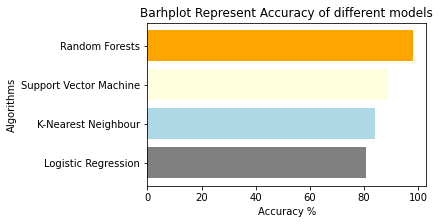

In [47]:
colors = ['grey','lightblue','lightyellow', 'orange']
pl.figure(figsize=(5,3))
pl.title("Barhplot Represent Accuracy of different models")
pl.xlabel("Accuracy %")
pl.ylabel("Algorithms")
pl.barh(model_ev['Model'],model_ev['Accuracy'],color = colors)
pl.show()

In [48]:
model_ev1 = pd.DataFrame({'Model tuned': ['Logistic Regression','K-Nearest Neighbour','Support Vector Machine', 'Random Forests'], 
                          'Tunned Accuracy': [lr_tun_score*100,knn_tuned_score*100,svc_tuned_score*100,rf_tuned_score*100]})
model_ev1

,Model tuned,Tunned Accuracy
0,Logistic Regression,81.52
1,K-Nearest Neighbour,99.03
2,Support Vector Machine,96.43
3,Random Forests,98.05


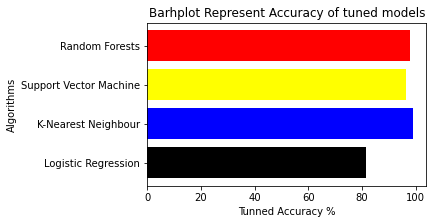

In [50]:
colors = ['black','blue','yellow','red']
pl.figure(figsize=(5,3))
pl.title("Barhplot Represent Accuracy of tuned models")
pl.xlabel("Tunned Accuracy %")
pl.ylabel("Algorithms")
pl.barh(model_ev1['Model tuned'],model_ev1[ 'Tunned Accuracy'],color = colors)
pl.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_head_knn = knn.predict(X_test)

svc = SVC(kernel='rbf', C=9)
svc.fit(X_train,y_train)
y_head_svm = svc.predict(X_test)

lr = LogisticRegression()
loj_model=lr.fit(X_train, y_train)
lr_predict = loj_model.predict(X_test)


rf=RandomForestClassifier(max_depth = 10, max_features = 5, min_samples_split = 2, n_estimators = 500)
rf.fit(X_train, y_train)
y_head_rf=rf.predict(X_test)


In [66]:
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_lr = confusion_matrix(y_test,lr_predict)
cm_rf = confusion_matrix(y_test,y_head_rf)

Text(15.0, 0.5, 'true label')

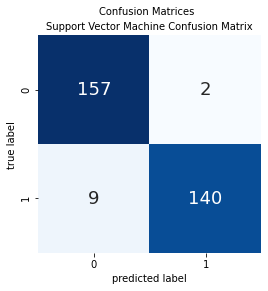

In [67]:


pl.figure(figsize=(4,4))
pl.suptitle("Confusion Matrices",fontsize=10, color="Black")
pl.subplots_adjust(wspace = 0.6, hspace= 0.6)



pl.title("Support Vector Machine Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm_svm,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
pl.xlabel("predicted label")
pl.ylabel("true label")




Text(15.0, 0.5, 'true label')

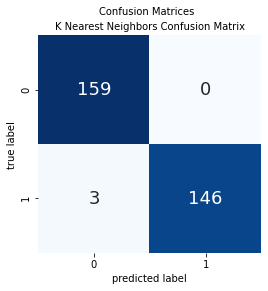

In [68]:
pl.figure(figsize=(4,4))
pl.suptitle("Confusion Matrices",fontsize=10, color="Black")
pl.subplots_adjust(wspace = 0.6, hspace= 0.6)

pl.subplot()
pl.title("K Nearest Neighbors Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm_knn,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
pl.xlabel("predicted label")
pl.ylabel("true label")


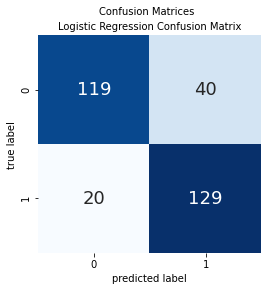

In [69]:
pl.figure(figsize=(4,4))
pl.suptitle("Confusion Matrices",fontsize=10, color="Black")
pl.subplots_adjust(wspace = 0.6, hspace= 0.6)
pl.title("Logistic Regression Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm_lr,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
pl.xlabel("predicted label")
pl.ylabel("true label")
pl.show()

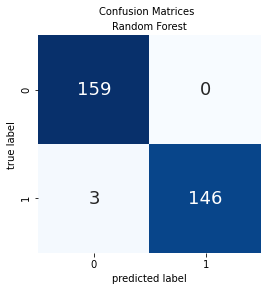

In [70]:
pl.figure(figsize=(4,4))
pl.suptitle("Confusion Matrices",fontsize=10, color="Black")
pl.subplots_adjust(wspace = 0.6, hspace= 0.6)
pl.title("Random Forest",fontsize=10,color="black")
sns.heatmap(cm_rf,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
pl.xlabel("predicted label")
pl.ylabel("true label")
pl.show()

In [ ]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)